Introducción
---
La Industria 4.0 ha transformado radicalmente la forma en que las empresas operan, gracias al acceso a tecnologías avanzadas y grandes volúmenes de datos. Hoy en día, las organizaciones pueden tomar decisiones más informadas y eficientes utilizando herramientas de análisis de datos y automatización. Esta revolución digital permite optimizar procesos, predecir tendencias y mejorar la toma de decisiones, lo que se traduce en una ventaja competitiva significativa en cualquier sector.

El sector hotelero, al igual que muchas otras industrias, ha comenzado a aprovechar las ventajas de la Industria 4.0 para mejorar la gestión de sus operaciones y la experiencia del cliente. A través del análisis de datos de reservas, los hoteles pueden obtener información valiosa sobre patrones de comportamiento, preferencias de los huéspedes y factores que influyen en las decisiones de compra, como el precio, el tiempo de anticipación o la probabilidad de cancelación.

Este proyecto tiene como objetivo analizar un conjunto de datos de reservas hoteleras para explorar cómo diferentes factores impactan en el precio, las cancelaciones, el comportamiento de los clientes, entre otras variables. Se utilizarán herramientas de ciencia de datos para responder preguntas clave sobre cómo se relacionan variables como el tiempo de anticipación con el precio de las habitaciones, y qué patrones pueden ayudar a los hoteles a tomar decisiones más estratégicas.

A lo largo del análisis, también se plantearán hipótesis y se establecerán objetivos específicos, que permitirán identificar oportunidades de mejora en la gestión hotelera, aprovechando los beneficios de la Industria 4.0.

Se incorporará el uso de un modelo predictivo con el objetivo de estimar probabilidades asociadas a determinados comportamientos o resultados dentro del proceso de reserva. Esta aplicación permitirá explorar el potencial de las herramientas de aprendizaje automático en contextos reales, y servirá como base para tomar decisiones más informadas a partir de los datos disponibles.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hoteles_dataset = pd.read_csv("hoteles_dataset.csv", delimiter=",", encoding="UTF-8")

In [3]:
hoteles_dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
type(hoteles_dataset)

pandas.core.frame.DataFrame

In [5]:
hoteles_dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
hoteles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
hoteles_dataset.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
hoteles_dataset.sample(5, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled


In [9]:
hoteles_dataset.shape

(36275, 19)

In [10]:
(hoteles_dataset.isna().sum()/hoteles_dataset.shape[0])*100
# No hay valores nulos (NaN) en ninguna columna del DataFrame hoteles_dataset.

,0
Booking_ID,0.0
no_of_adults,0.0
no_of_children,0.0
no_of_weekend_nights,0.0
no_of_week_nights,0.0
type_of_meal_plan,0.0
required_car_parking_space,0.0
room_type_reserved,0.0
lead_time,0.0
arrival_year,0.0


In [11]:
hoteles_dataset.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
# Se crea una columna con duración de la estancia
hoteles_dataset["total_nights"] = hoteles_dataset["no_of_weekend_nights"] + hoteles_dataset["no_of_week_nights"]

# Filtramos los precios bajos mayores a 0 (por debajo del percentil 5)
precio_min = hoteles_dataset[hoteles_dataset["avg_price_per_room"] > 0]["avg_price_per_room"].quantile(0.05)
precios_bajos = hoteles_dataset[(hoteles_dataset["avg_price_per_room"] > 0) & (hoteles_dataset["avg_price_per_room"] <= precio_min)]

In [13]:
precios_bajos["total_nights"].describe()

,total_nights
count,2620.000000
mean,2.980534
std,1.782997
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,22.000000


In [14]:
precios_bajos["market_segment_type"].value_counts(normalize=True)

,proportion
market_segment_type,
Offline,0.514122
Corporate,0.242748
Online,0.231298
Complementary,0.011832


In [15]:
precios_bajos["type_of_meal_plan"].value_counts(normalize=True)

,proportion
type_of_meal_plan,
Meal Plan 1,0.866031
Not Selected,0.120229
Meal Plan 2,0.013740


In [16]:
precios_bajos["room_type_reserved"].value_counts(normalize=True)

,proportion
room_type_reserved,
Room_Type 1,0.903053
Room_Type 4,0.081298
Room_Type 2,0.012214
Room_Type 5,0.001527
Room_Type 6,0.000763
Room_Type 7,0.000763
Room_Type 3,0.000382


Los precios bajos (mayores a cero y por debajo del percentil 5) están asociados con estancias cortas, reservas realizadas a través de canales offline o corporativos, y la elección de planes de comida básicos o sin selección. Además, la mayoría de los precios bajos corresponden a Room_Type 1, lo que sugiere que las habitaciones estándar o económicas son las más afectadas por tarifas promocionales o descuentos. Esto indica que los precios bajos no son errores, sino tarifas promocionales o segmentadas, por lo que estos precios deben mantenerse tal como están, ya que reflejan una estrategia comercial específica.

In [17]:
# Ordenamos el DataFrame por 'room_type_reserved' y 'avg_price_per_room' con una nueva copia del dataset
hoteles_dataset_copia = hoteles_dataset.sort_values(by=["room_type_reserved", "avg_price_per_room"], ascending=[True, False])

# Mostramos solo las dos columnas modificadas
print(hoteles_dataset_copia[["room_type_reserved", "avg_price_per_room"]])

      room_type_reserved  avg_price_per_room
33114        Room_Type 1               540.0
20900        Room_Type 1               365.0
13911        Room_Type 1               300.0
29779        Room_Type 1               300.0
30475        Room_Type 1               300.0
...                  ...                 ...
33510        Room_Type 7                 0.0
33579        Room_Type 7                 0.0
34991        Room_Type 7                 0.0
35983        Room_Type 7                 0.0
36080        Room_Type 7                 0.0

[36275 rows x 2 columns]


In [18]:
cantidad_de_ceros = (hoteles_dataset_copia["avg_price_per_room"] == 0).sum()
print(cantidad_de_ceros)
# Se observa una gran cantidad de 0, el cual es una incongruencia porque las habitaciones que se reservan deben tener un precio minimo para obtener ganancias.

545


In [19]:
# Se opta por generar el promedio segun el tipo de habitacion y reemplazar los valor de 0
# Se calcula el promedio por tipo de habitación
promedios_por_habitacion = hoteles_dataset_copia.groupby("room_type_reserved")["avg_price_per_room"].transform("mean")

# Reemplazo los valores de 0 con el promedio correspondiente de cada tipo de habitación
hoteles_dataset_copia["avg_price_per_room"] = hoteles_dataset_copia["avg_price_per_room"].where(
    (hoteles_dataset_copia["avg_price_per_room"] != 0), promedios_por_habitacion)


# Se muestra solo las dos columnas modificadas
print(hoteles_dataset_copia[["room_type_reserved", "avg_price_per_room"]])

      room_type_reserved  avg_price_per_room
33114        Room_Type 1          540.000000
20900        Room_Type 1          365.000000
13911        Room_Type 1          300.000000
29779        Room_Type 1          300.000000
30475        Room_Type 1          300.000000
...                  ...                 ...
33510        Room_Type 7          155.198291
33579        Room_Type 7          155.198291
34991        Room_Type 7          155.198291
35983        Room_Type 7          155.198291
36080        Room_Type 7          155.198291

[36275 rows x 2 columns]


In [20]:
promedios_por_tipo_de_habitacion = hoteles_dataset.groupby("room_type_reserved")["avg_price_per_room"].mean()

print(promedios_por_tipo_de_habitacion)

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64


In [21]:
promedios_por_tipo_de_habitacion = hoteles_dataset.groupby("room_type_reserved")["avg_price_per_room"].std()
print(promedios_por_tipo_de_habitacion)

room_type_reserved
Room_Type 1     28.003094
Room_Type 2     33.953959
Room_Type 3     55.746210
Room_Type 4     33.395173
Room_Type 5     49.684916
Room_Type 6     41.054018
Room_Type 7    100.135655
Name: avg_price_per_room, dtype: float64


In [22]:
promedios_por_tipo_de_habitacion = hoteles_dataset_copia.groupby("room_type_reserved")["avg_price_per_room"].std()
print(promedios_por_tipo_de_habitacion)
# Observamos que el desvio estandar pasa a ser mucho menor al modificar los valores 0.

room_type_reserved
Room_Type 1    25.603062
Room_Type 2    29.386632
Room_Type 3    27.948635
Room_Type 4    31.082238
Room_Type 5    37.675914
Room_Type 6    33.553286
Room_Type 7    48.341148
Name: avg_price_per_room, dtype: float64


In [23]:
hoteles_dataset_copia.to_csv("hoteles_dataset_copia.csv", index=False)

In [24]:
hoteles_dataset_nuevo = pd.read_csv("hoteles_dataset_copia.csv")
hoteles_dataset_nuevo

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.000000,0,Canceled,1
1,INN20901,2,1,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,365.000000,1,Canceled,3
2,INN13912,2,0,2,3,Meal Plan 2,0,Room_Type 1,170,2018,7,29,Offline,0,0,0,300.000000,0,Canceled,5
3,INN29780,2,0,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,300.000000,0,Canceled,3
4,INN30476,2,0,2,3,Meal Plan 2,0,Room_Type 1,151,2018,7,3,Offline,0,0,0,300.000000,0,Canceled,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN33511,2,2,0,2,Meal Plan 1,0,Room_Type 7,11,2017,12,11,Complementary,0,0,0,155.198291,3,Not_Canceled,2
36271,INN33580,2,1,0,1,Meal Plan 1,0,Room_Type 7,121,2018,8,31,Complementary,0,0,0,155.198291,3,Not_Canceled,1
36272,INN34992,2,0,0,1,Meal Plan 1,0,Room_Type 7,0,2017,11,5,Complementary,0,0,0,155.198291,2,Not_Canceled,1
36273,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,155.198291,1,Not_Canceled,1


In [25]:
# Se cuenta los valores únicos en la columna "room_type_reserved"
room_type_counts = hoteles_dataset_copia["room_type_reserved"].value_counts()

print(room_type_counts)

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [26]:
# Se cuenta los valores únicos en la columna "repeated_guest" (1- Cliente repetido 0- No es cliente repetido)
guest_type_counts = hoteles_dataset_copia["repeated_guest"].value_counts()

print(guest_type_counts)

repeated_guest
0    35345
1      930
Name: count, dtype: int64


Objetivos
---
Objetivo general:
El objetivo principal de este análisis es utilizar herramientas de ciencia de datos para explorar y entender los patrones en las reservas de hotel, y así poder hacer recomendaciones sobre cómo mejorar la toma de decisiones en la gestión hotelera.
Objetivos específicos:
•	Analizar la distribución de las reservas según el tipo de habitación
•	Explorar cómo el tiempo de anticipación afecta el precio promedio por habitación.
• Determinar si la elección del plan de comida influye en el precio promedio por habitación según el modo de venta
•	Ver si hay valores atípicos en los precios de las habitaciones y qué pueden significar.
•	Analizar la proporción de reservas canceladas versus las que se mantienen.
•	Analizar la distribución de los precios por habitación para identificar patrones, irregularidades y posibles factores que influyen en los valores atípicos.
•	Estudiar la correlación entre diferentes variables clave como precio y tiempo de anticipación.
•	Analizar el precio promedio de la habitacion segun el mes de llegada y segun el tipo de huesped
• Ver las cantidad de reservas por mes y estudiar las cancelaciones



Hipotesis
---
• H1: Se espera que haya tipo de habitaciones con mayor cantidad de reservas que otras, por las caracteristicas, precios, entre otros factores.
• H2: Cuanto mayor sea el tiempo de anticipación de una reserva, más bajo será el precio promedio por habitación.
• H3: Se espera que las reservas realizadas a través de agencia offline incluyan planes de comida más costosos, lo cual se reflejará en un mayor precio promedio por habitación en comparación con reservas online.
• H4: Es probable que haya valores atípicos en los precios de las habitaciones, ya que algunos precios pueden depender de habitaciones especiales, exlusivas o promociones puntuales.
• H5: Se espera que la cantidad de reservas canceladas sea mucho menor que las que se concretan
• H6: La distribución de los precios de las habitaciones muestra una concentración de precios bajos, pero algunos casos de habitaciones premium, con precios mucho más altos, generan un sesgo positivo que eleva el promedio general.
• H7: La correlación entre el precio promedio y el tiempo de anticipación será débil-medio, ya que otros factores podrían influir más en el precio final.
• H8: Se espera variabilidad en el precio de la habitacion segun el mes de llegada debido a etapas festivas, climas, entre otros factores. Además, se anticipa que los huéspedes recurrentes paguen un precio promedio menor por habitación.
• H9: Se plantea que a mayor cantidad de reserva por mes, mayor sera la cantidad de cancelaciones.





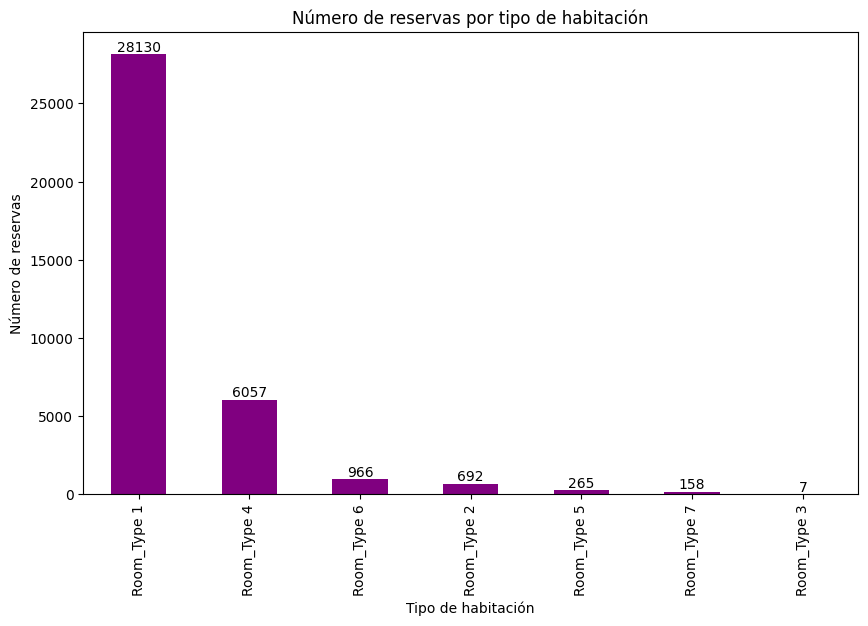

In [27]:
# ¿Cómo se distribuyen las reservas según el tipo de habitación reservado?

plt.figure(figsize=(10, 6))
ax = hoteles_dataset_copia["room_type_reserved"].value_counts().plot(kind="bar", color="purple")
plt.title("Número de reservas por tipo de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Número de reservas")
ax.bar_label(ax.containers[0])

plt.show()

# Podemos suponer que la mayoría de las reservas corresponden a habitaciones estándar o dobles (Room_Type 1), que son las más comunes y económicas.
# Las siguientes pueden tratarse de habitaciones familiares  (Room_Type 4),
# Suites individuales (Room_Type 6) o habitaciones mas amplias o de mayor categoria (Room_Type 2)
# Las habitaciones más exclusivas que suelen ser de mayor valor y menor demanda corresponderian a la (Room_Type 5,7 y 3)
# Teniendo en cuenta estas observaciones del grafico, podemos confirmar la H1, que sugiere que existen tipos de habitaciones con mayor demanda que otras.

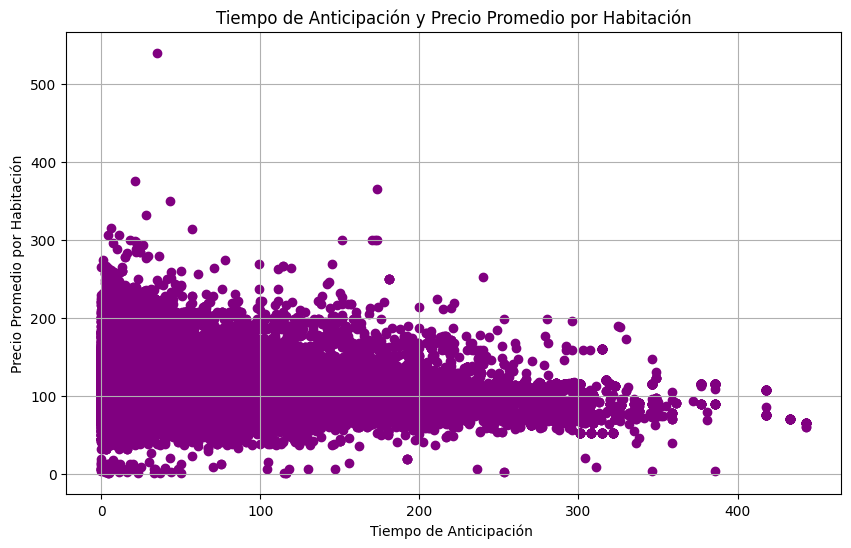

In [28]:
# ¿Existe una relación clara entre el tiempo de anticipación y el precio promedio por habitación? ¿Hay valores atípicos en los precios de las habitaciones?


plt.figure(figsize=(10, 6))
plt.scatter(hoteles_dataset_copia["lead_time"], hoteles_dataset_copia["avg_price_per_room"], color="purple")

plt.title ("Tiempo de Anticipación y Precio Promedio por Habitación")
plt.xlabel("Tiempo de Anticipación ")
plt.ylabel("Precio Promedio por Habitación")

plt.grid(True)
plt.show()

# Consideramos una variable continua avg_price_per_room y una variable discreta lead_time pero que toma gran cantidad de categorias posibles.
# El gráfico revela que la mayoría de las reservas se hacen con poca o ninguna anticipación en el cual los precios suelen ser más variados, llegando a ser bastante altos.
# A medida que aumenta el tiempo de anticipación, los precios tienden a disminuir, pero también se observa una menor cantidad de reservas realizadas con mayor anticipación.
# Existe un valor atípico con un precio muy alto, que podria tratarse de un error o una habitacion muy especial.
# La mayoría de las reservas se mantienen dentro de un rango de precios más estándar
# El hotel ajusta sus tarifas según la demanda y el tiempo de reserva, ofreciendo precios más competitivos para aquellos que reservan con mayor antelación
# Podemos confirmar la H2, pues a mayor tiempo de anticipacion el precio promedio por habitacion tiende a disminuir.

In [29]:
# Al analizar los precios por habitación, se detectó un valor extremadamente alto que no coincidía con ningún otro del conjunto de datos (el siguiente más alto era mucho menor).

outlier = hoteles_dataset_copia[hoteles_dataset_copia['avg_price_per_room'] > 500]

print(outlier)


      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
33114   INN33115             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
33114                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
33114        Room_Type 1         35          2018              3   

       arrival_date market_segment_type  repeated_guest  \
33114            25             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
33114                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  total_nights  
33114               540.0                       0       Canceled             1  


In [30]:
# Al tratarse de una habitacion del tipo 1, plan de comida tipo 1, y datos dentro del rango estandar, podemos concluir que se trata de un error, por lo que se decide eliminarlo.
# Luego de esta limpieza puntual, se continuara mas adelante el análisis del resto de los valores por encima del percentil 95.
hoteles_dataset_copia2 = hoteles_dataset_copia[hoteles_dataset_copia['avg_price_per_room'] <= 500].copy()

In [31]:
hoteles_dataset_copia2.to_csv('hoteles_dataset_copia2.csv', index=False)

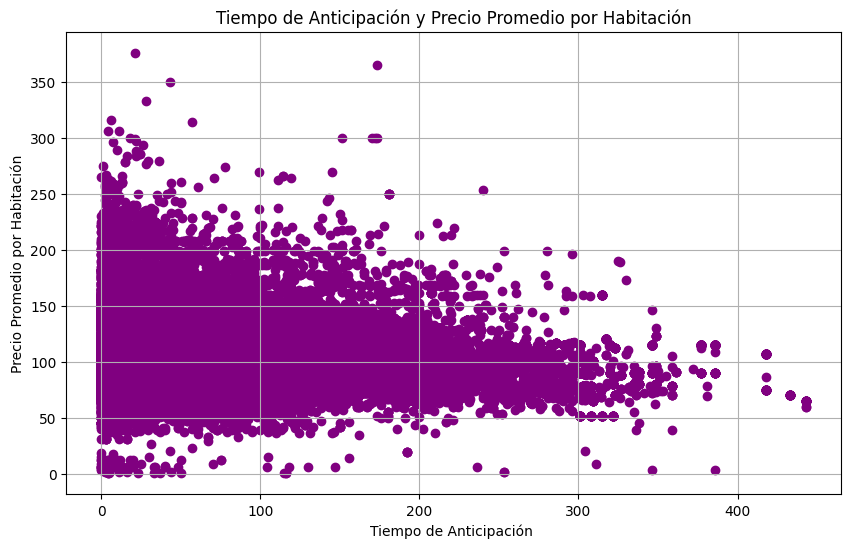

In [32]:
# Eliminando el valor atipico, tomamos un nuevo nombre al dataset, y mostramos el grafico sin el valor atipico

plt.figure(figsize=(10, 6))
plt.scatter(hoteles_dataset_copia2["lead_time"], hoteles_dataset_copia2["avg_price_per_room"], color="purple")

plt.title ("Tiempo de Anticipación y Precio Promedio por Habitación")
plt.xlabel("Tiempo de Anticipación ")
plt.ylabel("Precio Promedio por Habitación")

plt.grid(True)
plt.show()


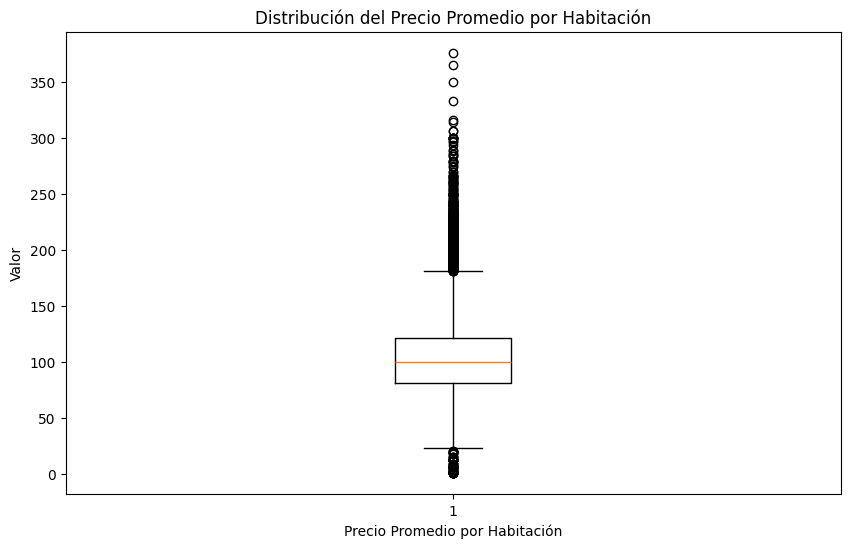

In [33]:
# ¿Cómo se distribuyen los precios de las habitaciones y qué indican los outliers?

plt.figure(figsize=(10, 6))
plt.boxplot(hoteles_dataset_copia2["avg_price_per_room"])
plt.xlabel('Precio Promedio por Habitación')
plt.ylabel('Valor')
plt.title('Distribución del Precio Promedio por Habitación')
plt.show()

#  El valor central del boxplot (la línea dentro de la caja) representa la mediana del precio por habitación, que en este caso es 100 euros, indicando que la mitad de las habitaciones tienen precios más bajos o más altos que este valor.
#  Entre 75 euros y 125 euros cubre la mayor parte de las habitaciones, el cual representa el rango intercuartil
#  Existen outliers positivos que representan precios mayores al habitual, por variables como el tipo de habitacion, cantidad de personas, tipo de comida, entre otros.
#  Outliers negativos que se tratan de habitaciones estandar, promociones, o no haber seleccionado ningun tipo de comida, es decir, no comer en el lugar.

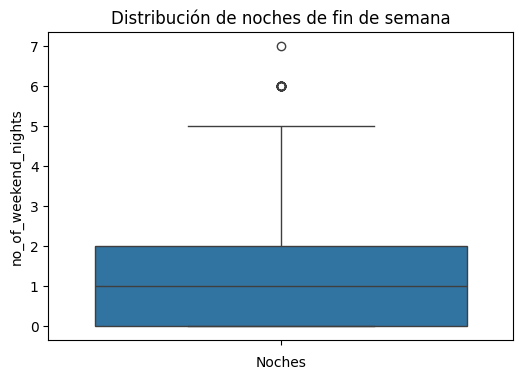

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(hoteles_dataset_copia2['no_of_weekend_nights'])
plt.title("Distribución de noches de fin de semana")
plt.xlabel("Noches")
plt.show()

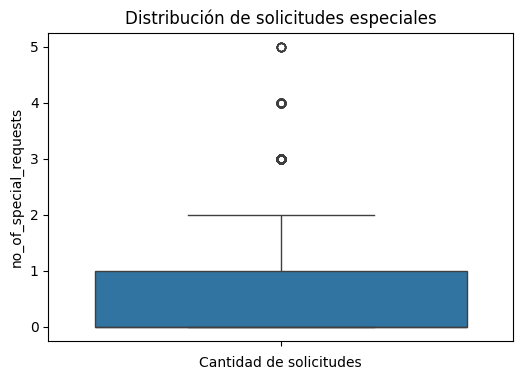

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(hoteles_dataset_copia2['no_of_special_requests'])
plt.title("Distribución de solicitudes especiales")
plt.xlabel("Cantidad de solicitudes")
plt.show()

In [36]:
# Al analizar los graficos de tres variables clave (avg_price_per_room, no_of_weekend_nights y no_of_special_requests), se identificaron valores atípicos, aunque no necesariamente erróneos.
# En precio por habitación, los valores superiores a $180 pueden considerarse atípicos, llegando hasta $400. Esto podría reflejar habitaciones premium, temporadas altas o reservas con servicios adicionales.
# En noches de fin de semana, más de 5 noches es poco común (la mayoria de las reservas tiene 2 o menos), pero puede deberse a feriados largos o estancias prolongadas.
# En solicitudes especiales, marca el límite en 2, aunque hay registros de hasta 5. Esto puede deberse a huéspedes con necesidades específicas, como familias o eventos.
# En todos los casos, estos valores no deberían eliminarse, ya que pueden representar situaciones reales del negocio.

In [37]:
# Tomaremos un ejemplo concreto para reforzar lo anterior

registro_atipico = hoteles_dataset_copia2[hoteles_dataset_copia2["no_of_weekend_nights"] == 7]
print(registro_atipico)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
19512   INN19513             2               0                     7   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
19512                 17       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
19512        Room_Type 1        188          2018              7   

       arrival_date market_segment_type  repeated_guest  \
19512             4              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
19512                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  total_nights  
19512               90.95                       1       Canceled            24  


In [38]:
# Este registro, aunque es inusual por tener 7 noches de fin de semana, parece coherente dentro del contexto.
# Tiene una habitación más grande, un plan de comida completo, varias solicitudes especiales y pertenece al segmento corporativo.
# Todo esto indica que es una reserva válida y no un error, probablemente asociada a una necesidad puntual como un evento largo o una estancia vacacional extensa.

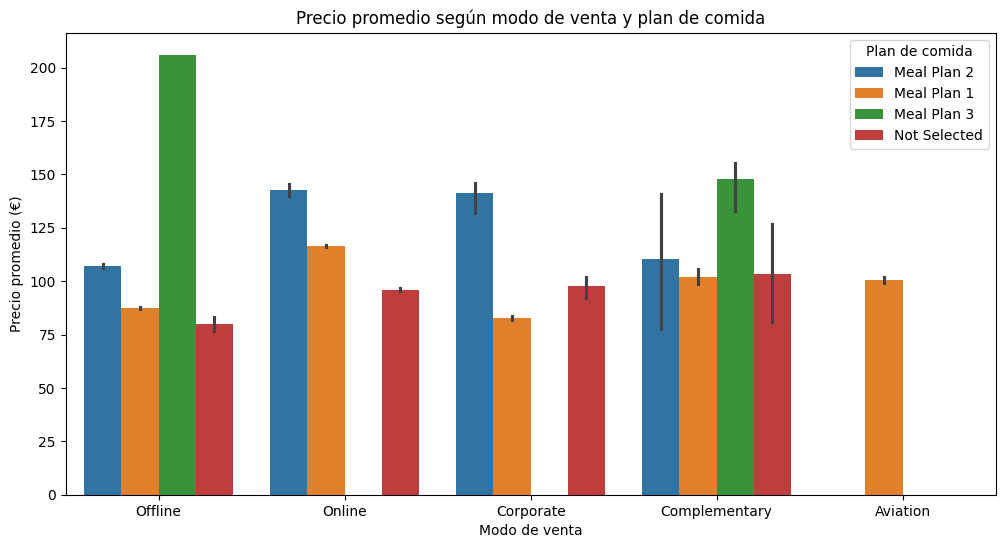

In [39]:
# ¿El plan de comida seleccionado influye en el precio promedio por habitación según el modo de venta?

plt.figure(figsize=(12, 6))
sns.barplot(data=hoteles_dataset_copia2, x="market_segment_type", y="avg_price_per_room",hue="type_of_meal_plan")
plt.title("Precio promedio según modo de venta y plan de comida")
plt.xlabel("Modo de venta")
plt.ylabel("Precio promedio (€)")
plt.legend(title="Plan de comida")
plt.show()

# Observamos que el meal plan 3 es el mas completo o exclusivo al tener un mayor precio. Meal plan 2 es un plan intermedio y el 1 es el basico.
# Es probable que el modo de venta de aviacion tenga sola una opcion de plan en la comida
# Los precios varian segun el modo de venta, donde el modo offline es el de menor valor para los planes 1, 2 y no haber seleccionado el modo de comida mientras que online son mayores.
# La hipótesis H3 no se confirma completamente. Las reservas offline tienden a tener precios más bajos en los planes de comida básicos e intermedios (Meal Plan 1 y 2), pero el Meal Plan 3 tiene un precio más alto en las reservas offline.
# Esto sugiere que la relación entre el canal de reserva y el precio depende también del tipo de plan de comida, por lo que no es completamente uniforme. Además, puede haber otros factores que influyan en el precio promedio de las habitaciones.

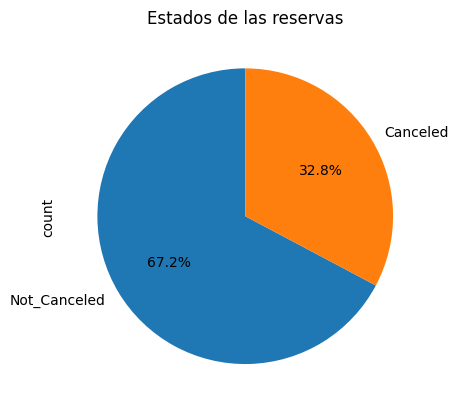

In [40]:
# ¿Cuántas reservas son canceladas en comparación con las que realmente se concretan?

hoteles_dataset_copia2["booking_status"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Estados de las reservas")
plt.show()

# En el grafico de torta podemos observar que el estado de reserva suele concretarse mucho mas que cancelarse. Esto era de esperar, pues se trata de un comportamiento habitual en el sector.
# Se confirma la hipotesis 5, pues la cantidad de reservas canceladas es mucho menor que las que se concretan

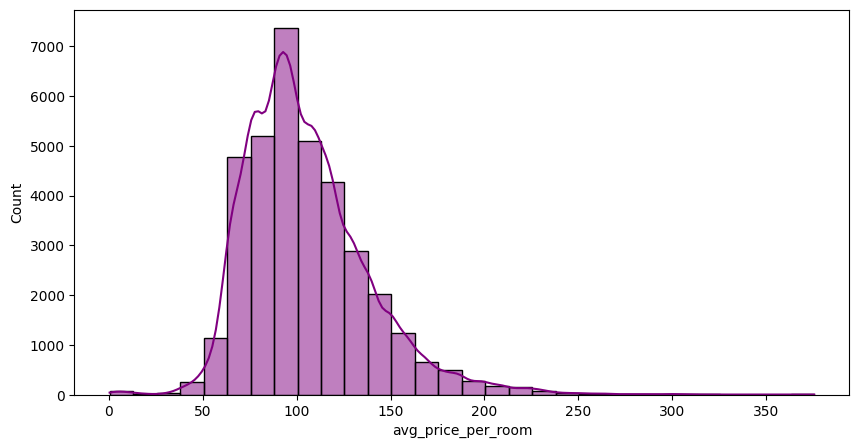

In [41]:
# ¿Cómo se distribuyen los precios de las habitaciones en general?

plt.figure(figsize=(10,5))
sns.histplot(hoteles_dataset_copia2["avg_price_per_room"], bins=30, kde=True, edgecolor="black", color="purple")
plt.show()

# Se puede observar que tiene un sesgo positivo, es decir que hay precio altos menos frecuentes pero posibles
# La mayoría de los precios por habitación se concentran alrededor de 90/100 euros por dia.
# Se observa un pequeño valle alrededor del valor 75, donde hay un menor número de habitaciones con ese precio. Esto podría deberse a una promoción particular o a una oferta no tan común en comparación con el resto de los precios
# Hay una pequeña ondulacion en 110 a 115 donde la frecuencia es un poco menor pero vuelve a subir levemente a pesar de que el precio un poco mayor
# La hipótesis 6 se confirma en general, pero el análisis sugiere que otros factores, además de las habitaciones premium, podrían estar afectando los precios. Las variaciones en puntos específicos (como 75 y 110-115) indican que el patrón no es uniforme y podría depender de promociones o tipos de habitaciones particulares.


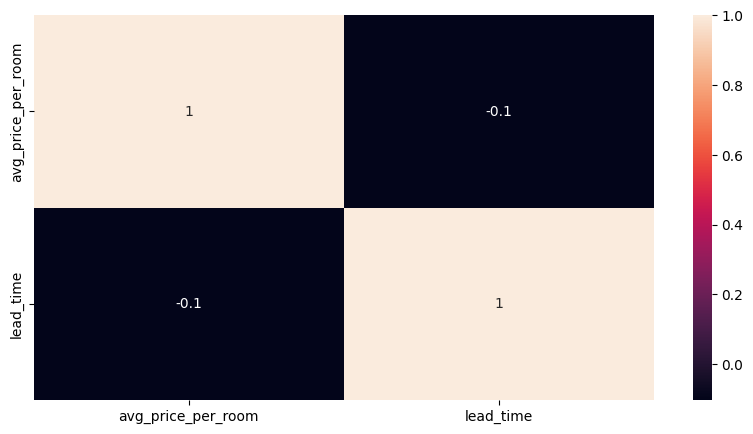

In [42]:
# ¿Qué tan fuerte es la correlación entre el tiempo de anticipación y el precio por habitacion?

variables = ["avg_price_per_room", "lead_time"]
plt.figure(figsize=(10,5))
cor_matrix = hoteles_dataset_copia2[variables].corr()
sns.heatmap(cor_matrix, annot=True)
plt.show()

# La correlación entre ambas variables es de -0,1, el cual existe una ligera tendencia negativa entre dos variables. El cual a medida que aumenta el tiempo de anticipacion, el precio de la habitacion tiende a disminuir, pero muy poco.
# Esto valida parcialmente la hipótesis H7, ya que aunque se esperaba una correlación débil-media, la relación observada es más débil de lo anticipado.

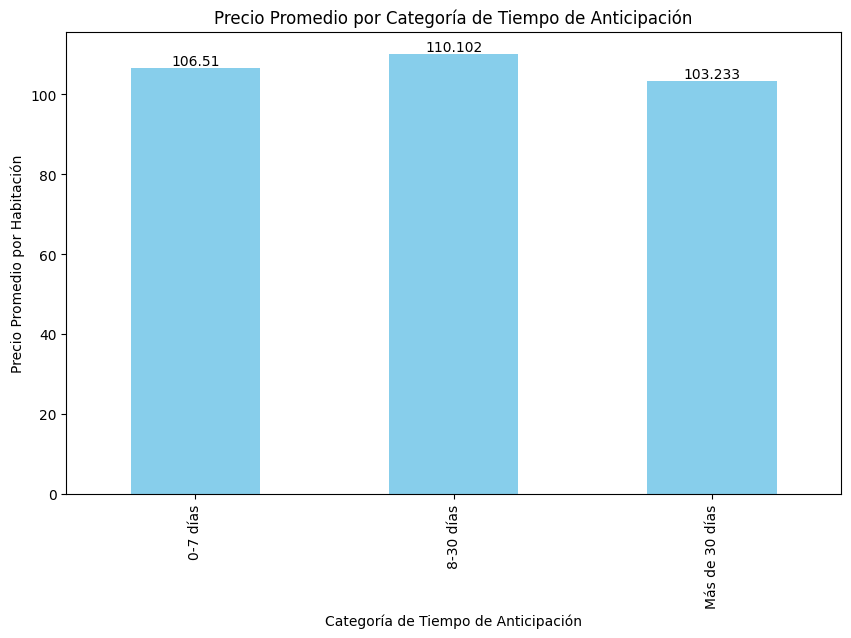

In [43]:
def categorizado_lead_time(x):
    if x <= 7:
        return '0-7 días'
    elif x <= 30:
        return '8-30 días'
    else:
        return 'Más de 30 días'

# Aplicamos la función a la columna 'lead_time' para crear una nueva columna categorizada
hoteles_dataset_copia2['lead_time_category'] = hoteles_dataset_copia2['lead_time'].apply(categorizado_lead_time)

# Calculamos el precio promedio por categoría de 'lead_time'
precio_promedio_por_categoria = hoteles_dataset_copia2.groupby('lead_time_category')['avg_price_per_room'].mean()

plt.figure(figsize=(10, 6))
ax = precio_promedio_por_categoria.plot(kind='bar', color='skyblue')

plt.title('Precio Promedio por Categoría de Tiempo de Anticipación')
plt.xlabel('Categoría de Tiempo de Anticipación')
plt.ylabel('Precio Promedio por Habitación')
ax.bar_label(ax.containers[0])
plt.show()

# Este gráfico de barras proporciona una visualización clara de cómo el precio promedio de la habitación cambia según el tiempo de anticipación.
# Aunque la correlación entre estas dos variables es bastante pequeña, este gráfico muestra visualmente cómo los precios fluctúan por categorías de tiempo de anticipación
# Las reservas de último minuto (0-7 días) parecen tener precios ligeramente más bajos en comparación con las que se hacen con 8-30 días de anticipación, lo cual puede estar relacionado con descuentos para llenar habitaciones rápidamente).
# En lo que respecto a mas de 30 dias, es posible que se apliquen precios promocionales para estancias reservadas con mucha anticipación, para asegurar ocupación futura.


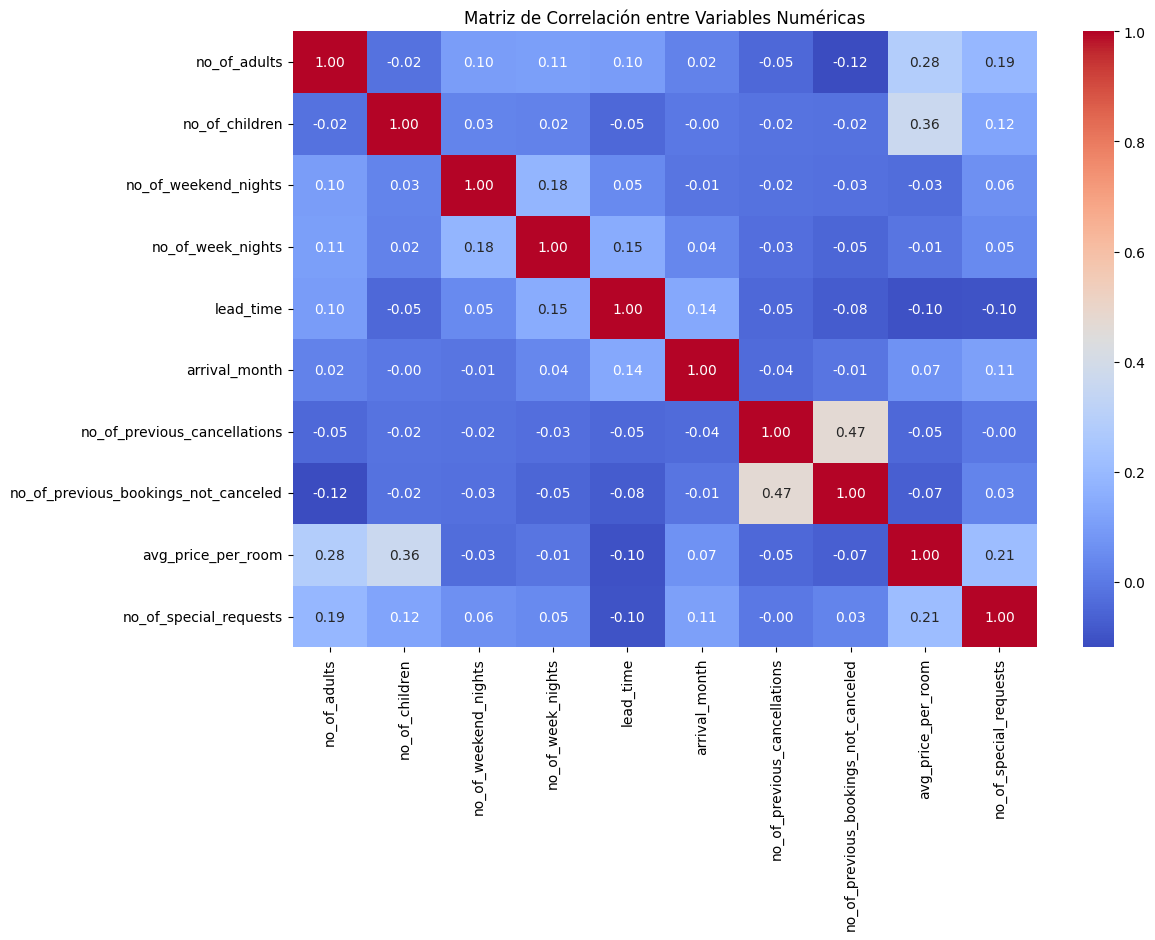

In [44]:
# Generamos la matriz de correlacion entre las distintas variables del dataset.

variables_numericas = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'lead_time', 'arrival_month',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']

correlation_matrix = hoteles_dataset_copia2[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Entre los hallazgos principales, se observa que la variable avg_price_per_room tiene una correlación positiva moderada con no_of_children (0.28) y con no_of_adults (0.36).
# Esto sugiere que, a mayor cantidad de personas por reserva, el precio promedio por habitación tiende a aumentar,
# Los resultados son lógicos, ya que habitaciones más grandes o con servicios adicionales suelen tener un precio más elevado.
# En general, la matriz muestra que, si bien no hay correlaciones extremadamente fuertes, sí existen patrones que pueden aprovecharse para segmentar mejor a los clientes
# Diseñar estrategias de precios más personalizadas, especialmente considerando el tamaño del grupo como una variable relevante

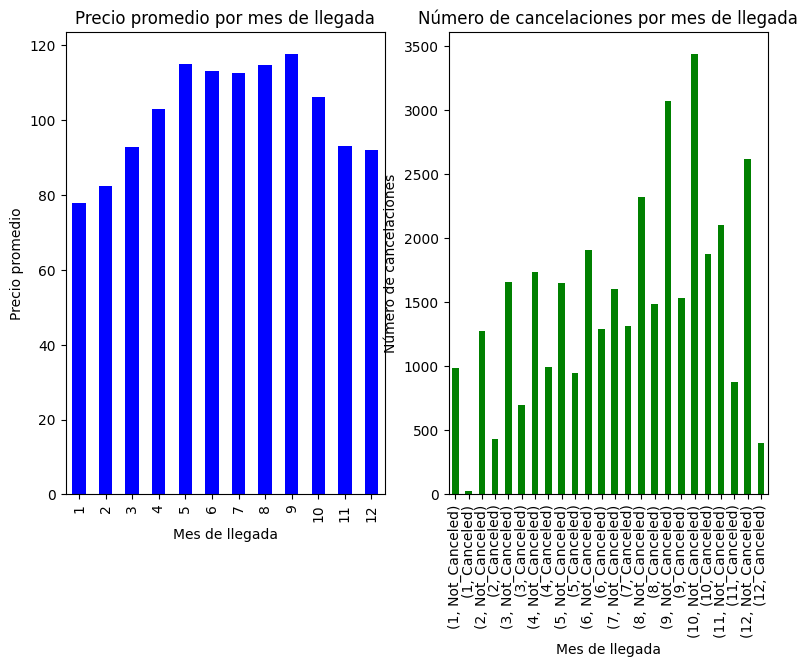

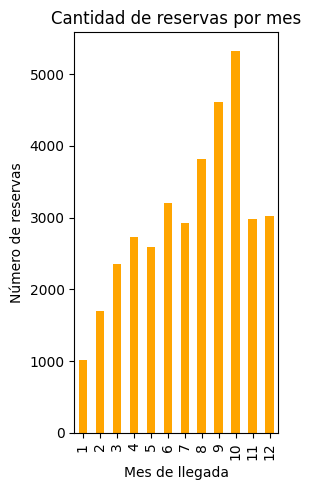

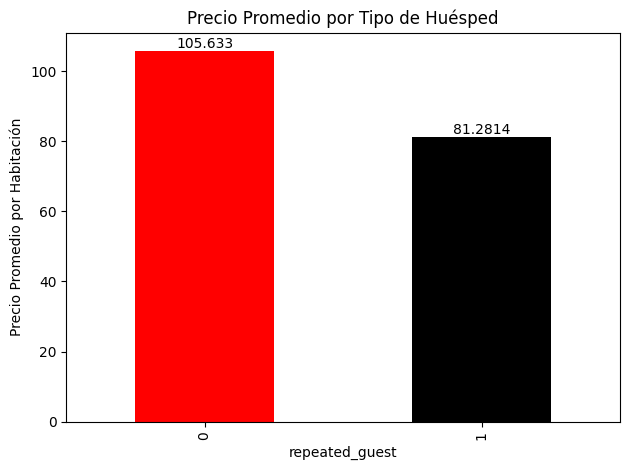

In [45]:
# Agrupamos por mes de llegada y calculamos el precio promedio, la cantidad de cancelaciones, reservas por mes y precio promedio segun tipo de huesped
precio_por_mes = hoteles_dataset_copia2.groupby("arrival_month")["avg_price_per_room"].mean()
cancelaciones_por_mes = hoteles_dataset_copia2.groupby("arrival_month")["booking_status"].value_counts()
precio_promedio_recurrente = hoteles_dataset_copia2.groupby('repeated_guest')['avg_price_per_room'].mean()
reservas_por_mes = hoteles_dataset_copia2["arrival_month"].value_counts().sort_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
precio_por_mes.plot(kind='bar', color='blue')
plt.title("Precio promedio por mes de llegada")
plt.xlabel("Mes de llegada")
plt.ylabel("Precio promedio")

plt.subplot(1, 3, 2)
cancelaciones_por_mes.plot(kind='bar', color='green')
plt.title("Número de cancelaciones por mes de llegada")
plt.xlabel("Mes de llegada")
plt.ylabel("Número de cancelaciones")

plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 3)
reservas_por_mes.plot(kind='bar', color='orange')
plt.title("Cantidad de reservas por mes")
plt.xlabel("Mes de llegada")
plt.ylabel("Número de reservas")

plt.tight_layout()
plt.show()

plt.title('Precio Promedio por Tipo de Huésped')
plt.xlabel('Tipo de Huésped')
plt.ylabel('Precio Promedio por Habitación')
plt.xticks([0, 1], ['No Recurrente', 'Recurrente'])
ax = precio_promedio_recurrente.plot(kind='bar', color=['red', 'black'])

ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

# Podemos observar que se cumple la H7, pues era de esperar que el el precio promedio de la habitacion varie segun el mes. Esto es muy comun en el sector hotelero, donde las temporadas altas suelen tener un precio un mayor.
# Se confirma la H8, el cliente recurrente suele pagar un precio promedio menor por habitacion. Esto se debe a que puede tener benefecios al ser un cliente que se hospeda seguido, obteniendo descuento en su estadia.
# Tambien se confirma que los meses con mayor cantidad de reservas también presentan más cancelaciones. Esto sugiere que el volumen de cancelaciones está directamente vinculado al volumen de reservas.

In [46]:
hoteles_dataset_copia2.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,lead_time_category
20900,INN20901,2,1,1,2,Meal Plan 2,0,Room_Type 1,173,2018,...,25,Offline,0,0,0,365.0,1,Canceled,3,Más de 30 días
13911,INN13912,2,0,2,3,Meal Plan 2,0,Room_Type 1,170,2018,...,29,Offline,0,0,0,300.0,0,Canceled,5,Más de 30 días
29779,INN29780,2,0,1,2,Meal Plan 2,0,Room_Type 1,173,2018,...,25,Offline,0,0,0,300.0,0,Canceled,3,Más de 30 días
30475,INN30476,2,0,2,3,Meal Plan 2,0,Room_Type 1,151,2018,...,3,Offline,0,0,0,300.0,0,Canceled,5,Más de 30 días
35970,INN35971,2,0,2,3,Meal Plan 2,0,Room_Type 1,172,2018,...,29,Offline,0,0,0,300.0,1,Canceled,5,Más de 30 días


# Aplicacion de modelo

En esta sección del trabajo vamos a usar machine learning, mas específicamente un modelo de clasificación dentro del aprendizaje supervisado, para tratar de predecir si una reserva será cancelada o no.

Esto se basa en enseñarle al modelo usando ejemplos reales: datos de reservas anteriores donde ya sabemos el resultado (cancelada o no cancelada). A partir de esos casos, el modelo aprende patrones y luego intenta predecir el resultado de nuevas reservas en función de sus características.

Para esto, elegimos usar un árbol de decisión, una técnica que permite construir un modelo claro y fácil de interpretar, ideal para entender qué factores influyen más en la cancelación.

El trabajo incluye varios pasos:

Transformar los datos para que el modelo los pueda usar correctamente.

Dividir el dataset en dos partes: una para entrenar al modelo y otra para probar si las predicciones son buenas.

Entrenar el árbol de decisión con los datos de entrenamiento.

Evaluar cómo se comporta el modelo utilizando métricas comunes como precisión, recall, f1-score y accuracy.

La idea es poder usar este modelo como una herramienta que ayude al hotel a anticipar cancelaciones y tomar mejores decisiones en su operativa diaria.

In [47]:
# Separamos el dataset en
# Variable x (factores que pueden influir en la cancelacion)
# Variable y (booking_status, que indica si una reserva fue cancelada o no)

X = hoteles_dataset_copia2.drop("booking_status", axis=1).copy()
y = hoteles_dataset_copia2.booking_status.copy()

In [48]:
X

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,lead_time_category
20900,INN20901,2,1,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,365.000000,1,3,Más de 30 días
13911,INN13912,2,0,2,3,Meal Plan 2,0,Room_Type 1,170,2018,7,29,Offline,0,0,0,300.000000,0,5,Más de 30 días
29779,INN29780,2,0,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,300.000000,0,3,Más de 30 días
30475,INN30476,2,0,2,3,Meal Plan 2,0,Room_Type 1,151,2018,7,3,Offline,0,0,0,300.000000,0,5,Más de 30 días
35970,INN35971,2,0,2,3,Meal Plan 2,0,Room_Type 1,172,2018,7,29,Offline,0,0,0,300.000000,1,5,Más de 30 días
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33510,INN33511,2,2,0,2,Meal Plan 1,0,Room_Type 7,11,2017,12,11,Complementary,0,0,0,155.198291,3,2,8-30 días
33579,INN33580,2,1,0,1,Meal Plan 1,0,Room_Type 7,121,2018,8,31,Complementary,0,0,0,155.198291,3,1,Más de 30 días
34991,INN34992,2,0,0,1,Meal Plan 1,0,Room_Type 7,0,2017,11,5,Complementary,0,0,0,155.198291,2,1,0-7 días
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,155.198291,1,1,0-7 días


In [49]:
y.unique()

array(['Canceled', 'Not_Canceled'], dtype=object)

In [50]:
y.value_counts(normalize=True)*100

,proportion
booking_status,
Not_Canceled,67.238242
Canceled,32.761758


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Se dividen los datos en un 70% para entrenamiento y un 30% para prueba.
# Mantenemos la proporción original de clases mediante la opción stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
X_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,lead_time_category
26324,INN26325,3,0,2,0,Meal Plan 2,0,Room_Type 4,100,2018,5,15,Online,0,0,0,210.60,2,2,Más de 30 días
34779,INN34780,2,0,1,2,Not Selected,0,Room_Type 1,27,2018,8,22,Online,0,0,0,139.00,1,3,8-30 días
12043,INN12044,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,12,10,Corporate,0,0,0,65.00,0,1,0-7 días
11387,INN11388,2,0,2,1,Meal Plan 1,0,Room_Type 1,37,2018,10,30,Offline,0,0,0,75.00,1,3,Más de 30 días
19200,INN19201,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Offline,0,0,0,60.00,0,3,0-7 días
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,INN11159,2,0,2,0,Not Selected,0,Room_Type 1,72,2018,11,13,Online,0,0,0,79.20,3,2,Más de 30 días
4364,INN04365,2,0,2,0,Meal Plan 2,0,Room_Type 1,386,2018,10,23,Online,0,0,0,115.00,1,2,Más de 30 días
27467,INN27468,2,0,2,3,Meal Plan 1,0,Room_Type 1,232,2018,10,23,Online,0,0,0,66.53,1,5,Más de 30 días
18710,INN18711,2,0,1,2,Meal Plan 1,0,Room_Type 4,36,2017,10,16,Offline,0,0,0,97.92,0,3,Más de 30 días


In [54]:
y_train

,booking_status
26324,Canceled
34779,Canceled
12043,Not_Canceled
11387,Not_Canceled
19200,Canceled
...,...
11158,Not_Canceled
4364,Canceled
27467,Not_Canceled
18710,Not_Canceled


In [55]:
# Eliminaremos la columna Booking_ID porque no aportan no aportan valor predictivo para el modelo
# Pueden causar problemas en el proceso de entrenamiento porque son datos arbitrarios (únicamente identificadores)
# No tienen ninguna relación con la variable objetivo

X_train = X_train.drop("Booking_ID", axis=1)
X_test = X_test.drop("Booking_ID", axis=1)

In [56]:
# Para usar modelos de machine learning, las variables categoricas se transforman en numericas mediante OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [57]:
# Convertimos las variables categoricas en columnas binarias
ohe = OneHotEncoder(sparse_output=False).fit(X_train[["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_category"]])

In [58]:
encoded = ohe.transform(X_train[["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_category"]])

In [59]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [60]:
encoded_df

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,lead_time_category_0-7 días,lead_time_category_8-30 días,lead_time_category_Más de 30 días
26324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
34779,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11387,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19200,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4364,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27467,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18710,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
# Después de codificar, las nuevas columnas binarizadas se agregan a X_train y X_test (mas adelante)
X_train = pd.concat([X_train, encoded_df], axis="columns")

In [62]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,lead_time_category_0-7 días,lead_time_category_8-30 días,lead_time_category_Más de 30 días
26324,3,0,2,0,Meal Plan 2,0,Room_Type 4,100,2018,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
34779,2,0,1,2,Not Selected,0,Room_Type 1,27,2018,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12043,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11387,2,0,2,1,Meal Plan 1,0,Room_Type 1,37,2018,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19200,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,2,0,2,0,Not Selected,0,Room_Type 1,72,2018,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4364,2,0,2,0,Meal Plan 2,0,Room_Type 1,386,2018,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27467,2,0,2,3,Meal Plan 1,0,Room_Type 1,232,2018,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18710,2,0,1,2,Meal Plan 1,0,Room_Type 4,36,2017,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
encoded_test = ohe.transform(X_test[["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_category"]])


In [64]:
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [65]:
X_test = pd.concat([X_test, encoded_df_test], axis="columns")

In [66]:
# Para evitar redundancia, se eliminan las columnas originales que ya han sido codificadas.
X_train = X_train.drop(["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_category"], axis=1)


In [67]:
X_test = X_test.drop(["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_category"], axis=1)

In [68]:
# La variable booking_status se convierte de texto a valores numéricos (0 y 1) para que el modelo de machine learning pueda procesarla.
reglas = {"Canceled": 1, "Not_Canceled": 0}

y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

In [69]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,lead_time_category_0-7 días,lead_time_category_8-30 días,lead_time_category_Más de 30 días
26324,3,0,2,0,0,100,2018,5,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
34779,2,0,1,2,0,27,2018,8,22,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12043,1,0,0,1,0,1,2017,12,10,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11387,2,0,2,1,0,37,2018,10,30,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19200,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,2,0,2,0,0,72,2018,11,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4364,2,0,2,0,0,386,2018,10,23,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27467,2,0,2,3,0,232,2018,10,23,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18710,2,0,1,2,0,36,2017,10,16,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
y_train

,booking_status
26324,1
34779,1
12043,0
11387,0
19200,1
...,...
11158,0
4364,1
27467,0
18710,0


In [71]:
# Se entrenó un árbol de decisión con los datos de entrenamiento
from sklearn.tree import DecisionTreeClassifier

In [72]:
arbol = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [73]:
y_train.isna().sum()

np.int64(0)

In [74]:
train_pred = arbol.predict(X_train)
test_pred = arbol.predict(X_test)

In [75]:
train_pred

array([1, 1, 0, ..., 0, 0, 1])

In [76]:
# Se generaron predicciones tanto para los datos de entrenamiento como de prueba, y se evaluó el desempeño con un reporte de clasificación
from sklearn.metrics import classification_report

In [77]:
print("Training")
print(classification_report(y_train, train_pred))
print("-------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Training
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17072
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25391
   macro avg       0.99      0.99      0.99     25391
weighted avg       0.99      0.99      0.99     25391

-------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7318
           1       0.79      0.80      0.79      3565

    accuracy                           0.86     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.86      0.86      0.86     10883



# **Metodologia aplicada**

* Selección de características (Feature Selection) y reducción de dimensionalidad

Para mejorar la eficiencia del modelo y reducir el riesgo de sobreajuste, se eliminaron columnas irrelevantes o poco informativas:
•	Se eliminó Booking_ID, ya que es un identificador único que no aporta valor predictivo.
•	Se aplicó codificación One Hot Encoding a variables categóricas como type_of_meal_plan, room_type_reserved, market_segment_type y lead_time_category, transformando cada categoría en una columna binaria.
•	Esto no reduce el número total de columnas, pero convierte las variables categóricas en una forma numérica útil para el modelo.

* Entrenamiento del modelo

Se seleccionó un modelo de clasificación para predecir la variable objetivo booking_status, que indica si una reserva fue cancelada o no. El algoritmo elegido fue un:
• Árbol de decisión (DecisionTreeClassifier), por su interpretabilidad y facilidad para trabajar con datos categóricos ya codificados.
•	Los datos fueron divididos en entrenamiento (70%) y prueba (30%) usando train_test_split, asegurando balance entre clases mediante stratify=y.
•	Se transformó la variable objetivo:
o	Canceled → 1
o	Not_Canceled → 0
•	Se entrenó el modelo sobre los datos procesados, y se generaron predicciones para ambos subconjuntos (entrenamiento y prueba).

*   Evaluacion del modelo y calculo de metricas

Al evaluar el modelo de árbol de decisión, se nota una diferencia bastante marcada entre cómo se comporta con los datos de entrenamiento y con los de prueba. Durante el entrenamiento, el modelo casi no se equivoca: tiene un accuracy del 99% y predice muy bien si una reserva será cancelada o no. Pero cuando se lo prueba con datos nuevos, que no había visto antes, su rendimiento baja al 86%.

Esto indica que el modelo se sobreajustó. Es decir, aprendió demasiado bien los detalles del entrenamiento, al punto de que "memorizó" casos en lugar de aprender patrones generales. Y por eso, cuando se enfrenta a nuevas situaciones, ya no responde igual de bien.

Es un resultado bastante común en árboles de decisión cuando no se les pone un límite en su crecimiento. Aunque en este caso no se busca mejorar el modelo, es importante reconocer este comportamiento porque muestra que, si se quisiera aplicar en la práctica, habría que ajustar su complejidad o probar modelos que generalicen mejor.


# Recomendaciones finales


El análisis de las reservas hoteleras revela una fuerte preferencia por las habitaciones estándar (Room_Type 1), lo que indica la necesidad de mantener su disponibilidad y calidad como parte central de la propuesta del hotel.

También se observa que los huéspedes recurrentes, aunque no son mayoría, tienden a ser más estables y predecibles. Este grupo representa una oportunidad concreta para trabajar en su fidelización, a través de beneficios como descuentos o servicios exclusivos que los incentiven a volver.

Se identifican claras variaciones de precios según la época del año, lo que confirma un comportamiento estacional. En el cual no solo se busca subir precios en temporada alta, sino de optimizar la ocupación en temporada baja mediante promociones específicas o paquetes atractivos. Debemos tener en cuenta tambien que las mayores cancelaciones se encuentran en los meses de mayor demanda, por lo cual realizar politicas mas estrictas en esas fechas como pagos anticipados y mayor flexibilidad en epocas de menor demanda para incentivar a reservas.

Por ultimo, el análisis de outliers mostró reservas con características poco comunes, como estancias largas, precios elevados o solicitudes especiales. Estos casos no son errores, sino señales de segmentos específicos como familias, viajeros premium o clientes corporativos. Identificarlos y adaptar la oferta con servicios personalizados o paquetes especiales representa una oportunidad concreta para diferenciarse y generar ingresos adicionales.



